# Numerické chyby a stabilita

V tomto cvičení si ukážeme základy práce s čísly na počítači. Uvidíme, jak lze celá a desetinná čísla reprezentovat v počítači. Dále analyzujeme vznik chyb při počítání s čísly a prozkoumáme (ne)stabilitu numerických metod.

Tyto základy jsou stěžení při návrhu numerických metod a počítačových algoritmů. Je potřeba mít na paměti, jak se v počítači nakládá s čísly a že to vždy vede k numerickým chybám. Jak uvidíme v této kapitole, v některých případech může matematicky správný postup výpočtu dát numericky (v počítači) zcela chybný výsledek!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Numerická matematika

Je věda, která se zabývá řešením matematicky formulovaných úloh pomocí logických operací a aritmetických operací s čísly o konečné délce.

Některé úlohy jsou již formulované tak, že je možné je přímo implementovat v počítači. To jsou typicky úlohy z *lineární algebry* vyžadující k řešení konečný počet kroků. Naopak spojité úlohy z *matematické analýzy* nejsou numericky formulované, tedy je nelze přímočaře na počítači vyřešit. V takovém případě je třeba úlohu převést na úlohu numerickou, která původní úlohu aproximuje s určitým **řádem přesnosti**.

Základním požadavkem je vyřešení úloh s dostatečnou přesností. U metod nás často zajímá **konvergence**, neboli počet kroků potřebných k dosažený danné přesnosti. U konvergence neuvažujeme zaokrouhlovací chyby, tedy konvergující metoda vyřeší úlohu pro libovolně malý krok $h \rightarrow 0$ s libovolně vysokou přesností.

Výběr metody závisí vždy na charakteru úlohy. Některé metody můžou být v jistých situacích výhodnější než jiné. Velkou roli také hrají výpočetní a pamětové nároky vybraného algoritmu.

## Reprezentace čísel v počítači

Reprezentace čísel v počítači má zasadní vliv na chyby při výpočtech. Tato podkapitola shrnuje standardizovanou reprezentaci celých a desetinných čísel.

### Celá čísla

Celá čísla jsou v počítači reprezentovány přesně. Stejně tak aritmetické operace jsou přesné, ovšem za podmínky, že hodnoty operandů a výsledku jsou ve stanoveném rozsahu. Pokud přesáhne hodnota určitou hranici, dojde k takzvanému **přetečení** nebo **podtečení**. U celých čísel je rozsah hodnot výrazně menší a je důležité s ním vždy počítat!

Chyby při arimetických výpočtech v počítačích mohou mít své důsledky [[1](https://www3.nd.edu/~markst/castaward/text10n.html), [2](https://www3.nd.edu/~markst/castaward/text9n.html)].

![Reprezentace celých čísel](../images/int_reprez.png)

S celočíselnými typy se setkáme v knihovně Numpy, kde každá matice nebo vektor má definovaný typ každého elementu. Defaultně se celá čísla ukládají jako `np.int32`:

In [2]:
arr = np.array([1, 2, 3, 4])
print(type(arr))
print(arr.dtype)

<class 'numpy.ndarray'>
int32


Kromě standardních typů `np.int32` a `np.int64` knihovna obsahuje i více-bitové reprezentace (až 256 bitů). Typicky pro numerické účely stačí 64-bitová reprezentace.

Příklady přetečení:

In [3]:
# FACTORIAL
f = 50

a:np.int32 = 1
#a = np.array([5], dtype=np.int32)
for i in range(1,f+1):
    a = np.dot(a,i)
    print(a)

1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
1932053504
1278945280
2004310016
2004189184
-288522240
-898433024
109641728
-2102132736
-1195114496
-522715136
862453760
-775946240
2076180480
-1853882368
1484783616
-1375731712
-1241513984
1409286144
738197504
-2147483648
-2147483648
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Pokud pracujeme s daty mimo knihovnu Numpy, jazyk python při běžných operacích kontroluje přetečení a při jeho detekci expanduje reprezentaci čísla:

In [4]:
# FACTORIAL - Python flexible integers
f = 50

a:np.int32 = 1
#a = np.array([5], dtype=np.int32)
for i in range(1,f+1):
    a = np.dot(a,i)
    print(a)

1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
1932053504
1278945280
2004310016
2004189184
-288522240
-898433024
109641728
-2102132736
-1195114496
-522715136
862453760
-775946240
2076180480
-1853882368
1484783616
-1375731712
-1241513984
1409286144
738197504
-2147483648
-2147483648
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #F4330C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #F7C8C0; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Pozor</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Pro numerických výpočty jsou flexibilní typy nevhodné. Výpočet 32 a 64-bitové reprezentace probíhá v procesoru velmi efektivně během jednoho taktu. Zatímco výpočty čísel s více-bitovými reprezentacemi nejsou procesorem hardwarově podporovány a proto jednoduché aritmetické operace trvají několik, klidně desítek taktů! To by příliš zpomalovalo numerickou metodu. Proto budeme vždy pracovat s knihovnou Numpy, která používá jen pevné reprezentace čísel.
</p>
</div>
</div>

### Desetinná čísla

Pro řešení úloh v reálné doméně potřebujeme reprezentovat desetinná čísla. Nejpoužívanější reprezentací je tzv. *floating-point* uložení desetinných čísel. Floating-point standard definuje základ $\beta$, exponent $E$ and přesnost $p$. Obecně tato reprezentace vypadá následovně:

$$ f = \pm \, d_1.d_2d_3 \dots d_p \times \beta^E, $$

kde $d_1.d_2d_3 \dots d_p$ se nazývá *mantisa*.

**Vlastnosti floating-point systému**
- Nejmenší kladné číslo (může dojít k [podtečení](https://en.wikipedia.org/wiki/Arithmetic_underflow))
- Největší číslo (může dojít k [přetečení](https://en.wikipedia.org/wiki/Integer_overflow))
- [Strojová přesnost](https://en.wikipedia.org/wiki/Machine_epsilon), $\varepsilon$, je definována jako rozdíl mezi hodnotou 1 a následujícím číslem, které lze uložit v floating-point reprezentaci (lze chápat jako horní odhad *relativní chyby* způsobené zaokrouhlováním při aritmetických operacích)
- Definice speciálních hodnot values: *nuly* (`-0`, `+0`), *nekonečen* (`-Inf`, `+Inf`), [not a number](https://en.wikipedia.org/wiki/NaN) (`NaN`)

![Floating-point reprezentace](../images/float_reprez.png)

V knihovně Numpy máme opět k dispozici odpovídající typy `np.float32` a `np.float64` (= *double* je defaultní).

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

I dnes se v některých případech se hodí využít typy nižší přesnosti (`np.int32` a `np.float32`), jelikož aritmetické operace jsou s nimi rychlejší, obzvlášt na grafických kartách. Float32 se často používá jako reprezentace v neuronových sítí pro zrychlení trénovacího procesu.
</p>
</div>
</div>

Numpy defaultní floating-point typ:

In [5]:
arr = np.array([1.5, 2.8, 7.9])
print(arr.dtype)

float64


Knihovna Numpy poskytuje podrobné informace ke každému typu:

In [8]:
print(np.finfo(np.float32))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------



In [9]:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



## Chyby ve výpočtech

Týká se pouze výpočtů s desetinými čísly.
Z definice floating-point reprezentace desetinných čísel je jasné, že není možné ukládat libovolné reálné číslo s absolutní přesností. Proto se ve výpočtech vždy objeví chyby. Zároveň provádění aritmetických operací vnese do výsledku další chybu vlivem zaokrouhlování, které je při konečné mantise potřeba.

### Základní definice

**Absolutní a relativní chyba**

* Přesná hodnota: $x$
* Přibližná hodnota hodnota: $\tilde{x}$

* Absolutní chyba: $A(x) = |\tilde{x} - x| \leq a(x)$, kde $a(x)$ je odhad absolutní chyby
* Relativní chyba: $R(x) = \frac{|\tilde{x} - x|}{|x|} \leq r(x)$, kde $r(x) \approx \frac{a(x)}{\tilde{x}}$ je odhad relativní chyby

* Intervalový odhad: $\tilde{x} - a(x) \leq x \leq \tilde{x} + a(x) \rightarrow x \approx \tilde{x} \pm a(x) \rightarrow  x \approx \tilde{x} (1 \pm r(x))$

**Počet platných číslic**

Relativní chyba $R$ odpovídá znalosti $p$ platných číslic, kde $p$ je největší celé číslo splňující: $R \leq 5 \times 10^{-p}$. Přesnosti výpočtů jsou tedy obvykle dané právě relativní chybou.

### Zdroje chyb

Chyby v numerických výpočtech vznikají několika způsoby. V této kapitole se na jednotlivé zdroje chyb podíváme podrobně a ilustrujeme si je na příkladech. Také nás bude zajímat, jak se chyby ve výpočtech mohou *šířit* a *hromadit*.

Ve zkratce máme:
* **Chyby zaokrouhlovací** - způsobené konečnou reprezentací čísel v počítači
* **Chyby metody** - vznikají aproximací, kterých se dopouštíme při převádění matematické úlohy na numerickou
* **Chyby vstupních dat** - ztracení přesnosti při uložení desetinných čísel do počítače ve vybrané reprezentaci

#### Chyby zaokrouhlovací

Zaokrouhlovací chyby vznikají při ukládání desetinných čísel v počítači a při aritmetických operacích s těmito čísli. Kvůli konečné reprezentaci dochází k mnoha případům a *numerickým jevům*, které můžou vést k nečekanému zhoršení ale i zlepšení výsledku! Některé zajímavé případy si teď ukážeme.

V pythonu se defautně vypisují čísla zkráceně. Vypsat přesnou hodnotu můžeme následovně:

In [13]:
print(0.1, 0.3)
print(format(0.3, ".55f"))

0.1 0.3
0.2999999999999999888977697537484345957636833190917968750


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #00843F; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #D6ECE1; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Tip</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Jelikož jsou čísla v počítači uložena v binární soustavě, většina desetinných čísel nemá přesnou reprezentaci. Číselný systém s desítkovou bází by toto nevýhodu sice neměl, ale výpočty v binární soustavě jsou výrazně rychlejší na počítači a jdou snadněji hardwarově implementovat.
</p>
</div>
</div>

**Chyba reprezentace**

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Srovnejte následující dvě čísla: $0.1 + 0.2$ a $0.3$ pomocí operátoru `==`. Co vám vyšlo? Vypište obě čísla zvlášť.
</p>
</div>
</div>

In [11]:
## DOPLŇTE ##
print(0.1 + 0.2 == 0.3, 0.1+0.2, 0.3)

False 0.30000000000000004 0.3


Vidíme, že součet dvou čísel již zanesl do výsledku malou chybu. Více se k tomuto můžete dozvědět [zde](https://docs.python.org/3/faq/design.html#why-are-floating-point-calculations-so-inaccurate).

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #F4330C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #F7C8C0; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Pozor</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Z předchozí ukázky je zřejmé, že není vhodné používat operátor `==` na srovnávání desetinných čísel! Vždy použijte `<` nebo `<=`, jinak může váš algoritmus dávat špatné výsledky.
</p>
</div>
</div>

**Odečítání podobných čísel**

Odečítání velmi blízkých čísel není vhodné, jelikož při tom vzniká velká relativní chyba. Dvě blízké čísla budou mít zvelké části stejnou mantisu. Po jejich odečtení dostaneme výsledek na malý počet platných číslic:

$$
a(x \pm y) = a(x) + a(y) \rightarrow r(x \pm y) \leq \max{(a(x), a(y))} \frac{a(x) + a(y)}{|x \pm y|}
$$

Pokud $x \approx y$, bude rozdíl $|x \pm y| \approx 0$ a tím pádem relativní chyba bude vysoká. Rozdílem blízkých čísel zesiluje původní chybu.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Uvažujte následující funkci: 
$$
f(x) = \frac{1 - \cos{x}}{x^2},
$$
pro kterou platí následující chování v okolí $0$:
$$ 
\lim_{x \to 0} f(x) = \frac{1}{2}. 
$$

Odhadněte limitu přiblížným výpočtem hodnoty funkce $f(x)$ v bodě $1.2 \times 10^{-8}$. Je výsledek správný? Pro jaké hodnoty $x$ dostáváte přesnější hodnotu? Jak se můžeme vyhnout rozdílu blízkych hodnot při výpoču funkce $f(x)$? 
</p>
</div>
</div>

In [107]:
## DOPLŇTE ##
def f(x):
    print(np.cos(x), 1 - np.cos(x), x**2)
    return (1 - np.cos(x)) / x**2

print(f(1.2e-8))

0.9999999999999999 1.1102230246251565e-16 1.44e-16
0.7709882115452477


**Asociativita**

V počítači nemusí platit asiciativita sčítání $(a+b)+c = a+(b+c)$. Ilustrujeme to na následující úloze:

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Spočítejte součet členů následující posloupnosti pro $n=400$ v dopředném a zpětném směru:
$$
0.9^0, \ 0.9^1, \ \dots, \ 0.9^n.
$$
Srovnejte výsledky a pokuste se je vysvětlit.
</p>
</div>
</div>

In [58]:
## DOPLŇTE ##
base = 0.9
n = 400

S = 0
for i in range(0,n+1):
    S += base**i
print(S)

S = 0
for i in range(n,-1,-1):
    S += base**i
print(S)

9.999999999999993
10.000000000000004


<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Při sčítání řady různě velkých čísel je tedy výhodnější nejdříve sčítat malé čísla a až pak větší. Pro efektivní a zárověň přesnější sčítání čísel lze využít například [Kahanův sčítací algoritmus](https://en.wikipedia.org/wiki/Kahan_summation_algorithm).
</p>
</div>
</div>

**Hromadění chyb 1**

Na následujícím příkladu uvidíme, že malá chyba se může ve výpočtu postupně nahromadit.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Spočítejte $x = 0.1 + 0.2 - 0.3$ v dvojité přesnosti (`np.float64`). Poté 100-krát zopakujte výpočet $x = x + x$. Jak byste vysvětlili výsledek?
</p>
</div>
</div>

In [20]:
## DOPLŇTE ##
x:np.float64 = 0.1 + 0.2 - 0.3
print(x)
for i in range(100):
    x = x + x
print(x)

5.551115123125783e-17
70368744177664.0


**Hromadění chyb 2**

Protipříklad hromadění chyb. Může se zdát, že k velkým chybám dochází až při mnoha výpočtech za sebou. Následující ukázka prokazuje opak.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Spočítejte hodnotu $e = \exp(1) = 2.71828...$ pomocí vzorce $e = \lim_{n \to \infty}{\left(1 + \frac{1}{n}\right)^{n}}$. Vyhodnoďtě a vypistě přibližnou hodnotu $e$ pro $n = 10^k$, kde $k = 1..7$. Také spočítejte relativní chybu. Co pozorujete?

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #00843F; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #D6ECE1; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Tip</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Je potřeba Python donutit počítat ve fixním typu `np.float32`. Provádějte výpočet za pomocí numpy pole `np.array(n, dtype=np.float32)`.

Může se vám hodit funkce `np.logspace(,,num=7,base=10)`.
</p>
</div>
</div>
</p>
</div>
</div>

In [48]:
## DOPLŇTE ##
e = 2.71828
K = 7
for n in np.logspace(1, 7, num=7, base=10):
    arr = np.array([n], dtype=np.float32)
    x = (1 + 1/arr)**arr
    print(x, np.abs(e - x)/e)

[2.593743] [0.04581463]
[2.7048113] [0.00495488]
[2.7170508] [0.00045223]
[2.718597] [0.00011657]
[2.7219622] [0.00135458]
[2.5952268] [0.04526881]
[3.2939677] [0.21178378]


**Vzájemné vyrušení chyb**

Někdy může dojít k několika chybám během výpočtu, které se v konečném výsledku vyruší. Toho lze využít pro zpřesnění určitých výpočtů.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Máme za úkol implementovat výpočet následující funkce pro libovolné $x$:
$$
f(x) = \frac{e^{x} - 1}{x}.
$$

Implementujte následující dva rozdílné algoritmy a spočítejte hodnotu funkce $f(x)$ pro $x = 10^{-5}..10^{-16}$:

1. If ($x = 0$) then $f = 1$; else $f = \frac{e^{x} - 1}{x}$.
2. $y = e^{x}$, If ($y = 1$) then f = 1; else $f = \frac{y - 1}{\log{y}}$.

Který z algoritmů je přesnější? Vypistě hodnotu čitatele a jmenovatele v počítaném podílu. Dokážete vysvětlit větší přesnost jednoho z algoritmů?
</p>
</div>
</div>

In [116]:
np.logspace(-5, -16, num=12, base=10)

array([1.e-05, 1.e-06, 1.e-07, 1.e-08, 1.e-09, 1.e-10, 1.e-11, 1.e-12,
       1.e-13, 1.e-14, 1.e-15, 1.e-16])

In [119]:
## DOPLŇTE ##

# 1., 2.
for i in np.logspace(-5, -15, num=12, base=10):
    print((np.exp(i) - 1)/i, (np.exp(i) - 1)/np.log(np.exp(i)))
    
print((np.exp(i) - 1), i, np.log(np.exp(i)))

1.000005000006965 1.0000050000166667
1.000000616442873 1.000000616423623
1.0000000764311845 1.000000075995558
1.0000000062384284 1.000000009369087
0.9999999753484707 1.0000000011550647
0.9999997446031695 1.0000000001424016
0.9999998870652326 1.000000000017556
0.9999996054137743 1.0000000000021643
0.9998187316137019 1.000000000000267
0.9989646455689632 1.0000000000000329
1.012863778612346 1.000000000000004
1.1102230246251565 1.0000000000000004
1.1102230246251565e-15 1e-15 1.110223024625156e-15


##### Závěr

- Jak jsme viděli, některé operace ve floating-point aritmetice nejsou přesné. Obecně **neplatí** *komutativita*, *asiciativita* a *distributivita*. Je dobré mít zejména na paměti následující:

$$
\begin{align}
& x \cdot x^{-1} \neq 1, \\
& (1 + x) - 1 \neq x, \\
& (x + y) + z \neq x + (y + z) 
\end{align}
$$

- Přesto existují operace, které jsou přesné:

$$
\begin{align}
& 1 \cdot x = x, \\
& x \cdot y = y \cdot x, \\
& x + x = 2 \cdot x
\end{align}
$$

- Chyby se v postupných výpočtech šíří. V některých případech se můžou odečítat, někdy naopak zesilovat nebo hromadit!

**Čemu se zejména vyhnout, abychom minimalizovali zaokrouhlovací chyby?**

- odčítání blízkých čísel
- odečítaní i sčítání čísel velmi odlišných řádů

#### Chyby metody

V případě kdy řešíme úlohu, která v matematické formulaci vyžaduje k vyřešení nekonečný počet kroků, nedokážeme napsat přesný algoritmus. Při převedení na numerickou úlohu se budeme muset dopustit jisté aproximace, aby bylo možné řešení spočítat v **konečném počtu kroků**.

Typycky výsledná numerická metoda je jistého **řádu**, určující závislost chyby metody na počtu kroků.

**Big-O notace**

Tato notace ukazuje řádovou závislost chyby na jistém rozměru úlohy (velikost kroku numerické metody).

Definice:
$$
f(x) =  O(g(x)) \quad \text{as} \quad x \rightarrow a
$$ 

přávě tehdy když

$$
|f(x)| \leq M |g(x)| \quad \text{as}\quad  |x - a| < \delta \quad \text{where} \quad M, a > 0.
$$ 

Tedy [big-O](https://en.wikipedia.org/wiki/Big_O_notation) notace vyjadřuje, že chyba v určité limitě ($x$ jdoucí k $a$, většinou $a = 0$ nebo $a = \infty$) nepřekročí hodnotu funkce $g$, až na konstantu $M$.

Uvažujme následující úlohu z matematické analýzy - Taylorův rozvoj funkce: 

* $f(x+h)=\sum_{n=0}^{\infty}\dfrac{f^{(n)}(x)}{n!}h^{n} = \sum_{n=0}^{\alpha-1}\dfrac{f^{(n)}(x)}{n!}h^{n} + O(h^{\alpha})$
* Řád metody $\alpha$: chyba veličiny úměrná $h^{\alpha}$

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Zkonstruujte Taylorův rozvoj následující funkce v bodě $a=x-h=0$ ([Maclaurinova řada](https://cs.wikipedia.org/wiki/Taylorova_%C5%99ada#Maclaurinova_%C5%99ada)):
$$
f(x) = e^x = \sum_{n}{\frac{x^n}{n!}}
$$
s využitím prvních 3 členů řady. 
1. Vykreslete do jednoho grafu funkci $e^x$ a aproximaci funkce $f(x)$ na intervalu $[-1, 1]$.
2. Spočítejte absolutní a relativní chyby v tomto intervalu a vykreslete do druhého grafu. Najděte maximum chyby.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #00843F; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #D6ECE1; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Tip</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Pro vyhodnocení faktoriálu můžete použít funkci `np.math.factorial`.
</p>
</div>
</div>
</p>
</div>
</div>

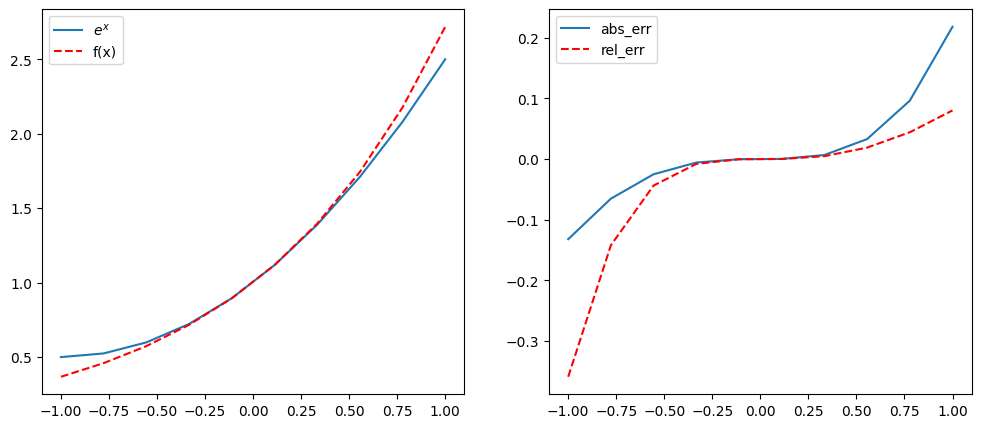

In [209]:
## DOPLŇTE ##

def f(x, N):
    fx = 0
    for n in np.arange(0, N):
        fx += x**n / np.math.factorial(n)
    return fx

plt.figure(figsize=(12,5))
plt.subplot(121)
xx = np.linspace(-1, 1, 10)
ff = f(xx, N=3)
fe = np.exp(xx)
plt.plot(xx, ff, label=r'$e^x$')
plt.plot(xx, fe, 'r--', label='f(x)')
plt.legend()

abs_err = (fe - ff)
rel_err = abs_err / fe
plt.subplot(122)
plt.plot(xx, abs_err, label='abs_err')
plt.plot(xx, rel_err, 'r--', label='rel_err')
plt.legend();

**Vztah chyb**

Je dobré mít na paměti, že i když teoreticky může s menším krokem jít chyba metody k nule, vždy se budou ve výpočtu vyskytovat chyby zaokrouhlovací!
Vzájemný vztah těchto dvou chyb ilustruje následující obrázek:

![Vztah chyb](../images/vztah_chyb.png)

#### Chyby vstupních dat

Vstupní data jsou hodnoty, které vkládáme do počítače. Při jejich uložení již dojde ke zaokrouhlovací chybě, která již může způsobit chybný výsledek.

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Implementujte metodu, která najde všechna řešení kvadratické rovnice:
$$
a x^2 + bx + c = 0.
$$

Najděte kořeny pro $a = 1/3, b = \sqrt{4*7*1/3}, c = 7$. Funguje vaše metoda správně? Kolik nalezla kořenů?
</p>
</div>
</div>

In [184]:
## DOPLŇTE ##

def kvad_koreny(a,b,c):
    D = b**2 - 4*a*c
    print(D)
    if (D > 0):
        return (-b + np.sqrt(D))/a, (-b + np.sqrt(D))/a
    elif (D < 0):
        return None
    else:
        return -b/a

#b**2 = 4*a*c
print(kvad_koreny(1/3, np.sqrt(4*7*1/3), 7))

1.7763568394002505e-15
(-9.165151263471135, -9.165151263471135)


## Stabilita

Numerická metoda může za uřčitých podmínek zesilovat zaokrouhlovací chyby, které se vyskytnou z počátku výpočtu. Takovým metodám se říká nestabilní. U takových metod nepomůže snížit krok.



<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

S využitím jednoduché přesnosti (`np.float16`) spočítejte prvních 20 mocnic zlatého řezu:

$$
\phi = \frac{\sqrt{5} - 1}{2}.
$$
    
Použijte následující rekurentní vzorec $(\phi^{0} = 1, \phi^{1} = \phi)$:
    
$$
\phi^{n+1} = \phi^{n-1} - \phi^{n}.
$$

Porovnejte s hodnotami vypočtenými přímým umocněním. Vykreslete do grafu jak hodnoty, tak relativní chybu.
</p>
</div>
</div>

0.6180339887498949


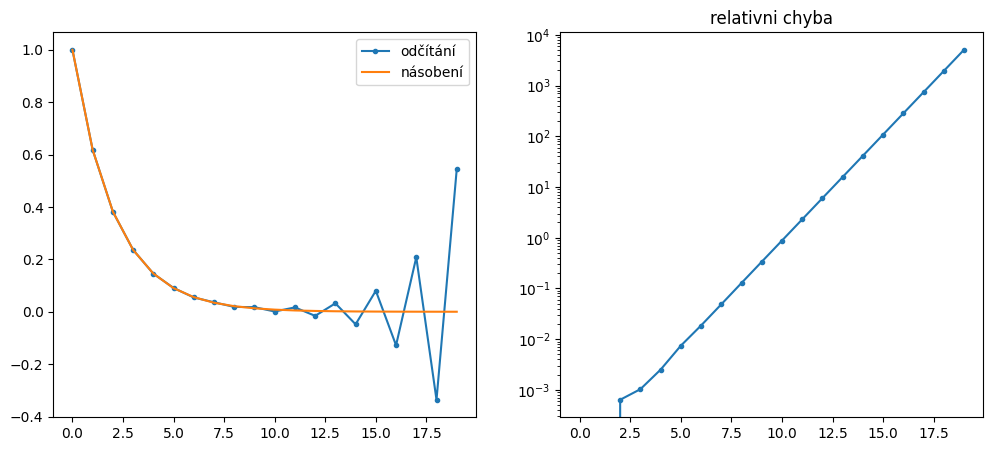

In [208]:
## DOPLŇTE ##
phi = (np.sqrt(5) - 1) / 2
print(phi)

N = 20
phis = np.zeros(N, dtype=np.float16)
phis2 = np.zeros(N, dtype=np.float16)
phis[0] = 1
phis[1] = phi
phis2[0] = 1
phis2[1] = phi
for i in range(2, N):
    phis[i] = phis[i-2] - phis[i-1]
    phis2[i] = phi**i

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(phis, '.-', label='odčítání')
plt.plot(phis2, label='násobení')
plt.legend()

plt.subplot(122)
plt.plot(np.abs(phis2-phis)/phis2, '.-')
plt.yscale('log')
plt.title('relativni chyba');

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol - zápočet 1</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

[ZDE](ukol1)
</p>
</div>
</div>